(300, 300, 1)

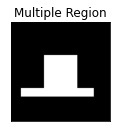

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib
def pic1():
    # initialize our canvas as a 300x300 pixel image with 3 channels
    # (Red, Green, and Blue) with a black background
    canvas1 = np.zeros((300, 300, 1), dtype="uint8")
    cv2.rectangle(canvas1, (100, 100), (200,200),1,-1)
    cv2.rectangle(canvas1, (30, 225), (250, 200),1, -1)

    plt.subplot(221), plt.imshow(canvas1, cmap='gray')
    plt.title('Multiple Region'), plt.xticks([]), plt.yticks([])
    return canvas1
arr1 = pic1()
width = arr1.shape[0]
length = arr1.shape[1]
arr1.shape

(300, 300, 1)

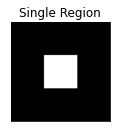

In [15]:
def pic2():
    # initialize our canvas as a 300x300 pixel image with 3 channels
    # (Red, Green, and Blue) with a black background
    canvas3 = np.zeros((300, 300, 1), dtype="uint8")
    # blue=(0,0,255)
    cv2.rectangle(canvas3, (100, 100), (200, 200), 1, -1)

    plt.subplot(221), plt.imshow(canvas3, cmap='gray')
    plt.title('Single Region'), plt.xticks([]), plt.yticks([])
    return canvas3
arr2 = pic2()
width = arr2.shape[0]
length = arr2.shape[1]
arr2.shape

(300, 300, 1)

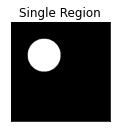

In [16]:
def pic3():
    # initialize our canvas as a 300x300 pixel image with 1 channel
    canvas3 = np.zeros((300, 300, 1), dtype="uint8")
    cv2.circle(canvas3, (100,100), 50, 1, -1)
    plt.subplot(221), plt.imshow(canvas3, cmap='gray')
    plt.title('Single Region'), plt.xticks([]), plt.yticks([])
    return canvas3
arr3 = pic3()
width = arr3.shape[0]
length = arr3.shape[1]
arr3.shape

In [17]:
def find_first_pixel(arr):
    stop_flag=0
   # canvas3 = pic()
    length = arr.shape[0]
    width = arr.shape[1]
    for i in range(length):
        if (stop_flag==0):
            for j in range(width):
                if (arr[i][j] == 1):
                    x = i
                    y = j
                    stop_flag=1
                    break
    return (x, y)

In [19]:
# works but doesn't handle outside pic pixels
def border_tracing_4(arr):
    p0 = find_first_pixel(arr)
    row = p0[0] #current row
    col = p0[1] #current_column
    borders = [p0] #list to add p (border pixels)
    dirc = 3
    search = (dirc+3) % 4 #the next direction we're gonna check

    while(1):
        search_col = col #column of the next direction
        search_row = row            #row of the next direction
            
        if (search == 0):
            search_col = col+1  #increase column
        
        if (search == 1):
            search_row = row-1          #decrease row
            #if (search_row < 0):
              #  search=search+1            
        
        if (search == 2): #decrease column
            search_col = col-1
            #if (search_col < 0):
                #search=search+1
               
        if (search == 3): #increase row
            search_row = row+1  

                
        if (arr[search_row][search_col] == 1): #when we find a pixel with intensity=1
            row = search_row
            col = search_col
            borders.append((row,col))
            if (borders[-1] == borders[1] and borders[-2] == borders[0] and len(borders)>2): #stopping criteria
                break 
                
            if(borders[-1][1] > borders[-2][1]): # to right
                dirc = 0                  
            elif(borders[-1][0] < borders[-2][0]): #upwards
                dirc = 1
            elif(borders[-1][1] < borders[-2][1]): #to left
                dirc = 2                      
            elif(borders[-1][0] > borders[-2][0]): #downwards 
                dirc = 3        
            search = (dirc+3) % 4
            
        else:
            search = search+1
            if(search>3):
                search=0

    return borders #coz last two vals are repeated
    
# b=border_tracing_4(arr1)
# b        

In [20]:
b1=border_tracing_4(arr1)

In [21]:
b2=border_tracing_4(arr2)

In [22]:
b3=border_tracing_4(arr3)

In [23]:
def show(b1):
    from PIL import Image
    from IPython.display import display
    data_in_array = np.array(b1)
    transposed = data_in_array.T 
    x, y = transposed 
    plt.axis([0, 300, 0, 300])
    plt.plot(x, y, 'ro')
    plt.savefig('img3.jpg')
    image=Image.open("./img3.jpg")
    transposed  = image.transpose(Image.ROTATE_270)
    transposed.show()

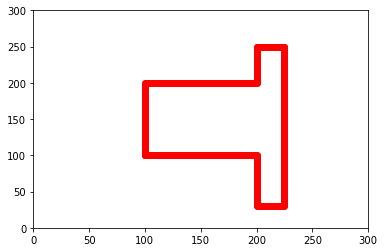

In [24]:
show(b1)

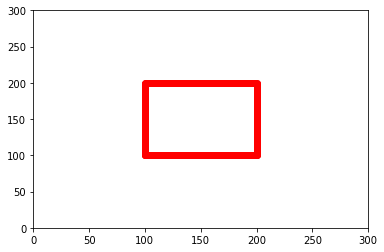

In [25]:
show(b2)

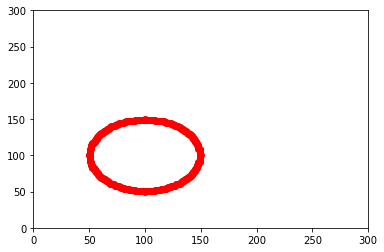

In [26]:
show(b3)

In [27]:
import numpy as np
import cv2 as cv
img = cv.imread('HoughCircles.jpg',0)
img = cv.medianBlur(img,5)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=30,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',img)
cv.waitKey(0)
cv.destroyAllWindows()